# **1.Defining the question**

## **a)Specifying the Data Analytic question**
How can we predict which individuals are most likely to have or use a bank account while providing insights into some of key demographic factors that might drive individual financial outcome?

## **b)Metric for success**

## **c)Context**

## **d)Experimental design taken**

# **2.Univariate Analysis**

## Reading the data

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data
df=pd.read_csv('http://bit.ly/FinancialDataset')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## Examining the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
df.shape

(23524, 13)

In [ ]:
#Checking for null values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#Removing null values
df.dropna(inplace=True)

In [ ]:
#Checking to see null values have been removed 
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#Checking types of our variables
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
#Renaming columns
df.rename(columns={'The relathip with head':'The relationship with head'},inplace=True)
df.rename(columns={'Level of Educuation':'Level_of_education'},inplace=True)
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level_of_education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df.value_counts()

country   year  uniqueid       Has a Bank account  Type of Location  Cell Phone Access  household_size  Respondent Age  gender_of_respondent  The relationship with head  marital_status           Level_of_education   Type of Job         
Uganda    2018  uniqueid_999   No                  Rural             No                 8.0             30.0            Female                Spouse                      Married/Living together  Primary education    Other Income            1
Rwanda    2016  uniqueid_254   No                  Rural             Yes                6.0             45.0            Male                  Head of Household           Married/Living together  Primary education    Informally employed     1
                uniqueid_2541  No                  Rural             Yes                5.0             34.0            Female                Spouse                      Married/Living together  Primary education    Farming and Fishing     1
                uniqueid_2542  No    

## Detecting Outliers

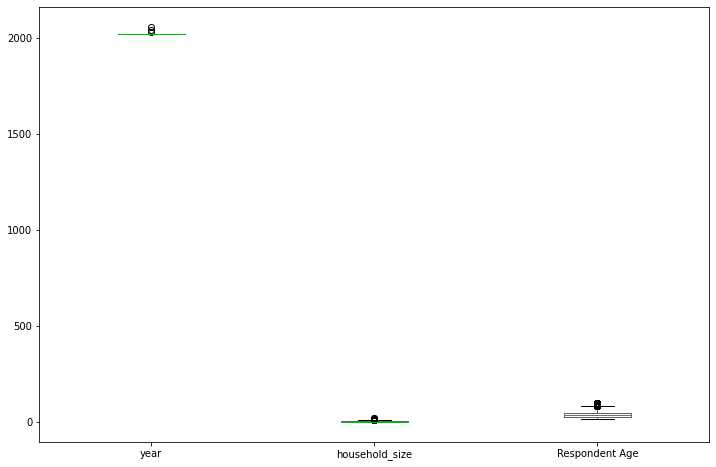

In [ ]:
df.plot(kind='box',figsize=(12,8))

In [ ]:
#Checking for the outlier values in Year column
df['year'].value_counts()

2016    8683
2018    8157
2017    6500
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [ ]:
#Examining outlier of year 2029
df.loc[df['year']== 2029]


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level_of_education,Type of Job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent


In [ ]:
#Examining outlier of year 2039
df.loc[df['year']== 2039]


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level_of_education,Type of Job
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [ ]:
#Examining outlier of year 2056
df.loc[df['year']== 2056]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level_of_education,Type of Job
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private


In [ ]:
#Dropping outliers
df.drop(df.index[df['year']==2029],inplace=True)
df.drop(df.index[df['year']==2039],inplace=True)
df.drop(df.index[df['year']==2056],inplace=True)

In [ ]:
#Checking to see outliers have been dropped
df['year'].value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

In [ ]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with head,marital_status,Level_of_education,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## Visualising of Categorical Variables

Text(0, 0.5, 'Number of respondents')

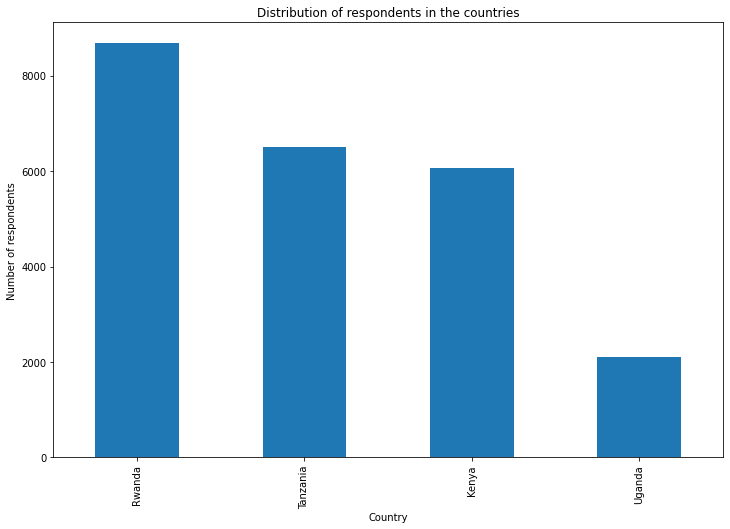

In [ ]:
#countries
df['country'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of respondents in the countries')
plt.xlabel('Country')
plt.ylabel('Number of respondents')

Text(0, 0.5, 'Number of respondents')

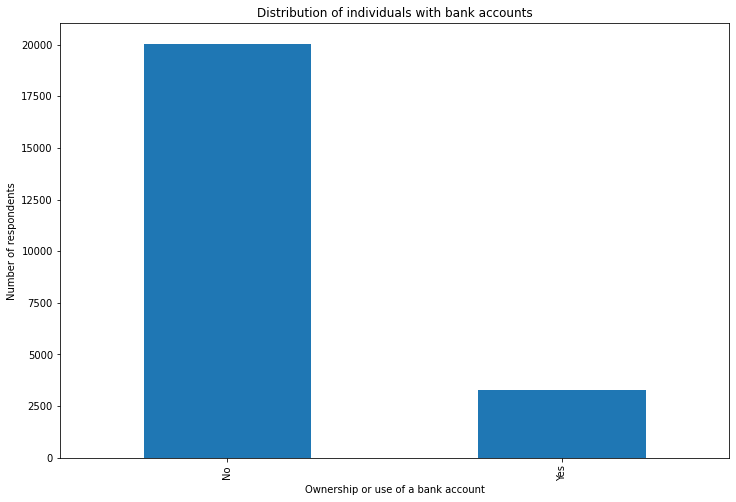

In [ ]:
#Bank account
df['Has a Bank account'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of individuals with bank accounts')
plt.xlabel('Ownership or use of a bank account')
plt.ylabel('Number of respondents')


Text(0, 0.5, 'Number of respondents')

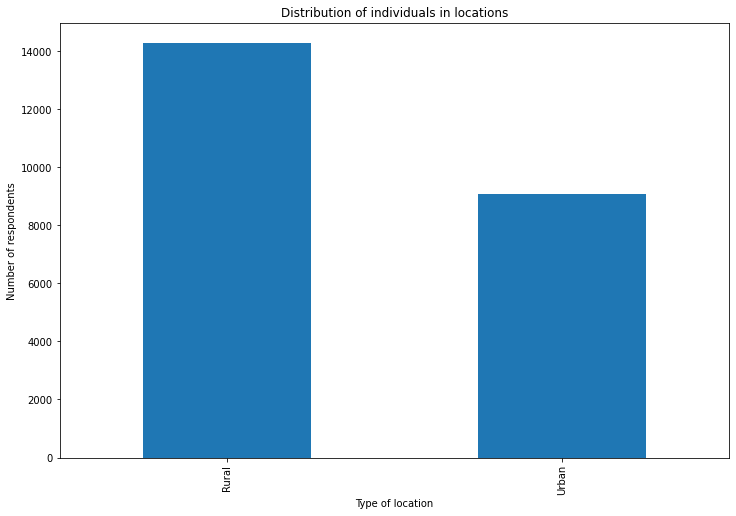

In [ ]:
#Location
df['Type of Location'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of individuals in locations')
plt.xlabel('Type of location')
plt.ylabel('Number of respondents')

Text(0, 0.5, 'Number of respondents')

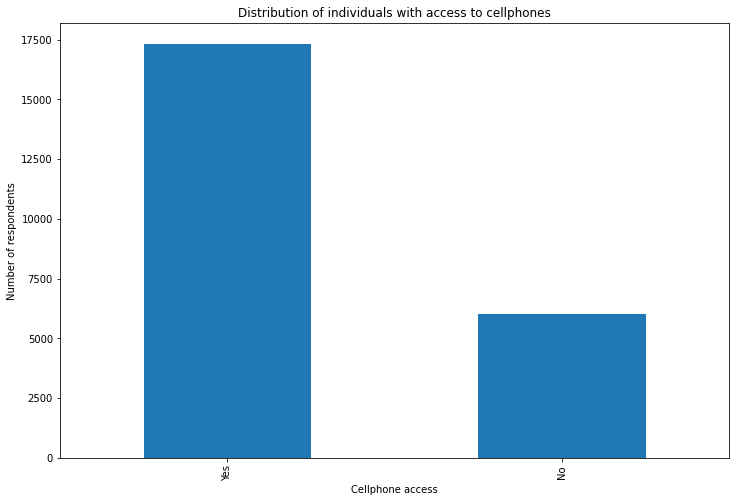

In [ ]:
#Cellphone access
df['Cell Phone Access'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of individuals with access to cellphones')
plt.xlabel('Cellphone access')
plt.ylabel('Number of respondents')

Text(0, 0.5, 'Number of respondents')

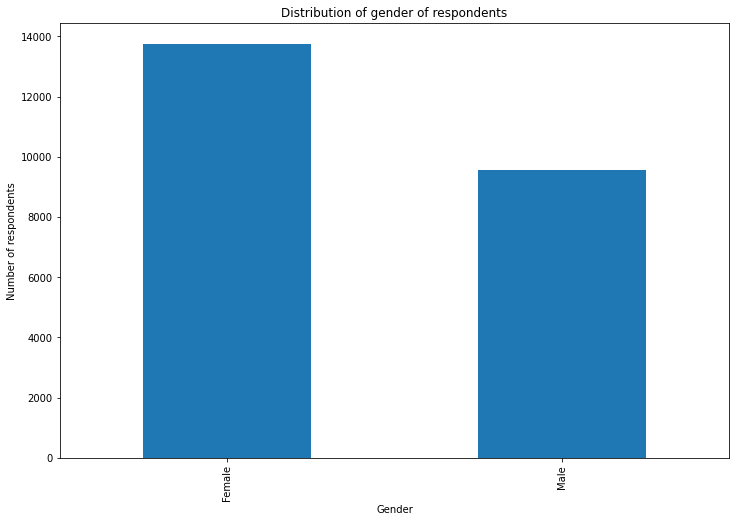

In [ ]:
#Gender
df['gender_of_respondent'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of gender of respondents')
plt.xlabel('Gender')
plt.ylabel('Number of respondents')

Text(0, 0.5, 'Number of respondents')

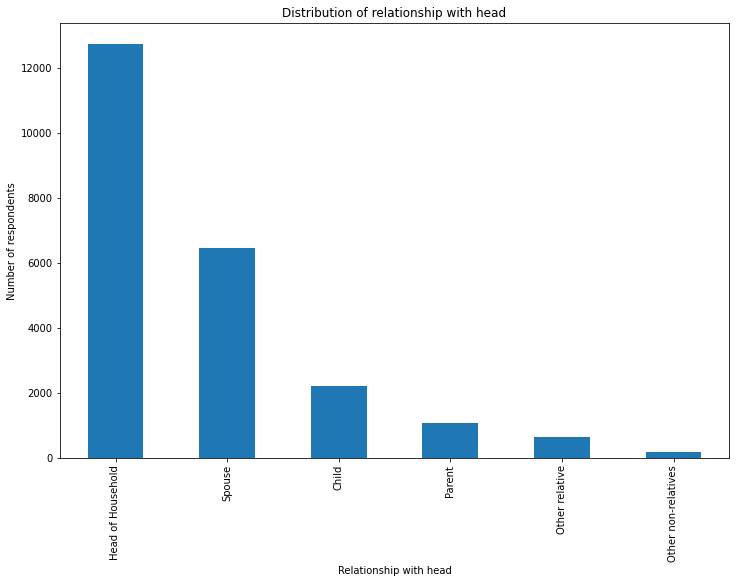

In [ ]:
#Relationship with head
df['The relationship with head'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of relationship with head')
plt.xlabel('Relationship with head')
plt.ylabel('Number of respondents')

Text(0, 0.5, 'Number of respondents')

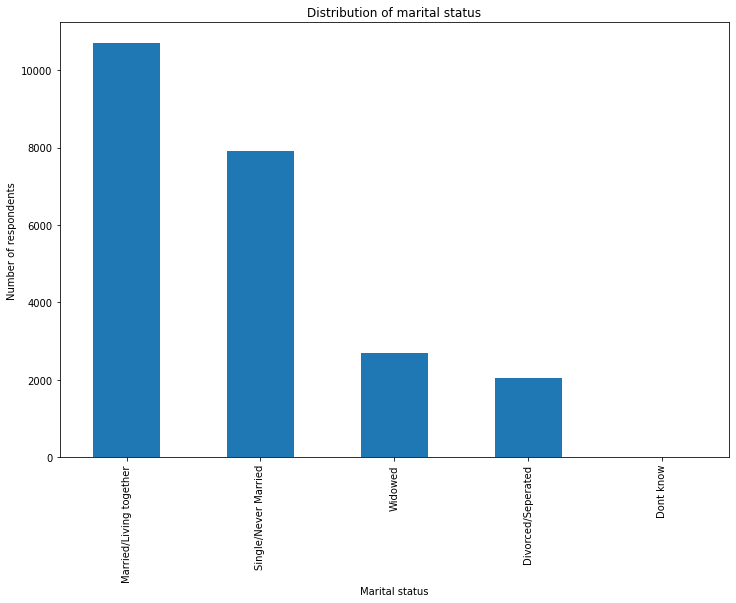

In [ ]:
#Marital status
df['marital_status'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of marital status')
plt.xlabel('Marital status')
plt.ylabel('Number of respondents')

Text(0, 0.5, 'Number of respondents')

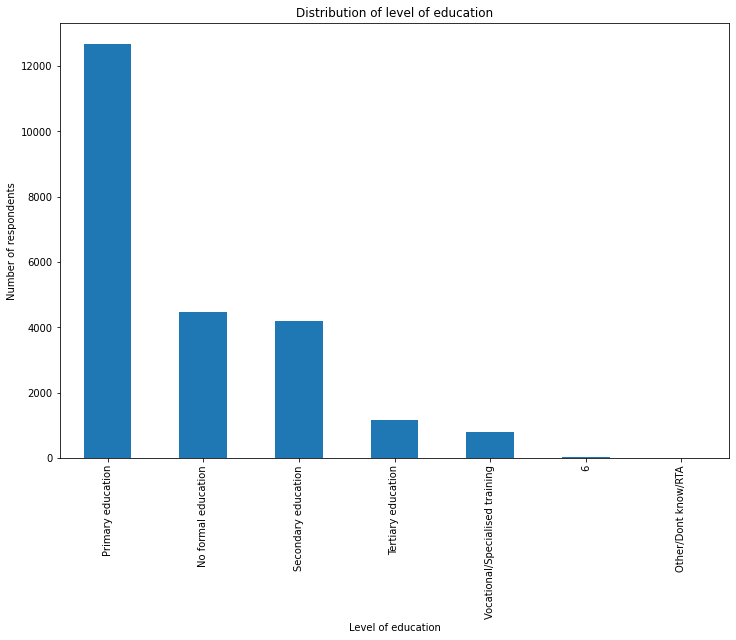

In [ ]:
#Level of education
df['Level_of_education'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of level of education')
plt.xlabel('Level of education')
plt.ylabel('Number of respondents')

Text(0, 0.5, 'Number of respondents')

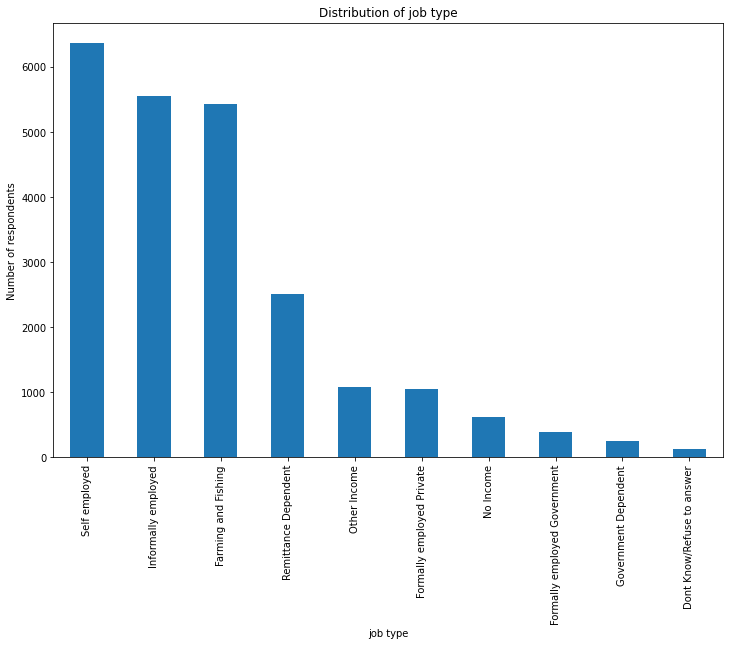

In [ ]:
#Job type
df['Type of Job'].value_counts().plot(kind='bar',figsize=(12,8))
plt.title('Distribution of job type')
plt.xlabel('job type')
plt.ylabel('Number of respondents')

## Visualising Numerical Variables

In [ ]:
df.describe()

,year,household_size,Respondent Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
#Skewness
print(df.skew())

year              0.042833
household_size    0.974183
Respondent Age    0.840615
dtype: float64


In [ ]:
#Kurtoisis
print(df.kurt())

year             -1.611829
household_size    1.153836
Respondent Age    0.098268
dtype: float64


Text(0.5, 1.0, 'Histogram of household size')

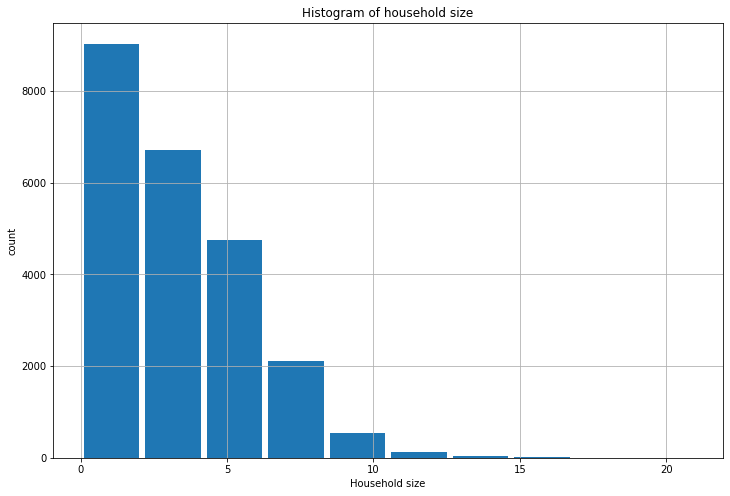

In [ ]:
#Household size
df['household_size'].hist(figsize=(12,8),rwidth=0.9)
plt.xlabel('Household size')
plt.ylabel('count')
plt.title('Histogram of household size')

Text(0.5, 1.0, 'Histogram of respondent age')

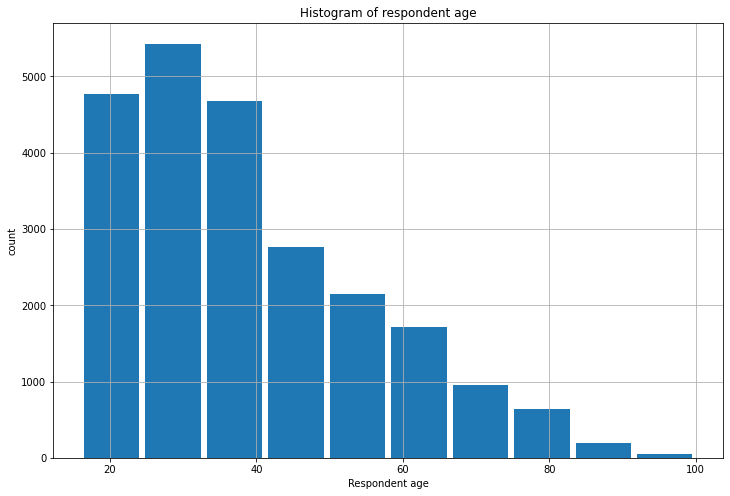

In [ ]:
#Respondent age
df['Respondent Age'].hist(figsize=(12,8),rwidth=0.9,grid=True)
plt.xlabel('Respondent age')
plt.ylabel('count')
plt.title('Histogram of respondent age')

## Summary

*	Rwanda has the highest number of respondents while Uganda has the leas
*	A high number of people do not have access or ownership to bank accounts
*	A majority of respondents from the conducted research live in rural areas
* A majority of people have access to cell phones
*	Female respondents are more than male respondents
*	The majority of respondents are heads of the household while the least number of respondents come from non-relatives
*	Most of the respondents are married/living together with the least number don't know their marital status
*	Most of the respondents have only managed to complete their level of education in Primary education
* A majority of respondents to the research are self employed
*	Most of the respondents live in households with less than 5 people
*	Majority of respondents are aged between 20-40


# **3.Bivariate Analysis**

Since possession or access to a bank account is our metric for success,we will use it to make comparisons to other variables.

## Numerical & Numerical Variables analysis

In [ ]:
df.corr()

,year,household_size,Respondent Age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
Respondent Age,-0.018554,-0.119671,1.000000


## Categorical & Categorical Variables analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


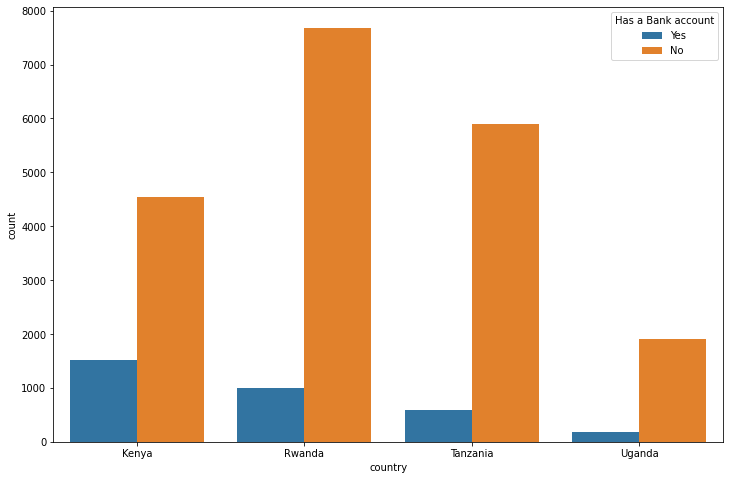

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['country'],hue=df['Has a Bank account'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


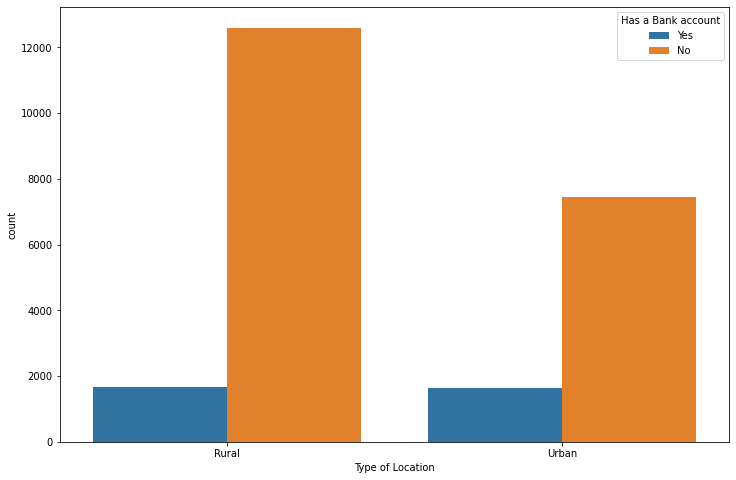

In [ ]:

plt.figure(figsize=(12,8))
sns.countplot(df['Type of Location'],hue=df['Has a Bank account'])



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gender vs possession of bank account')

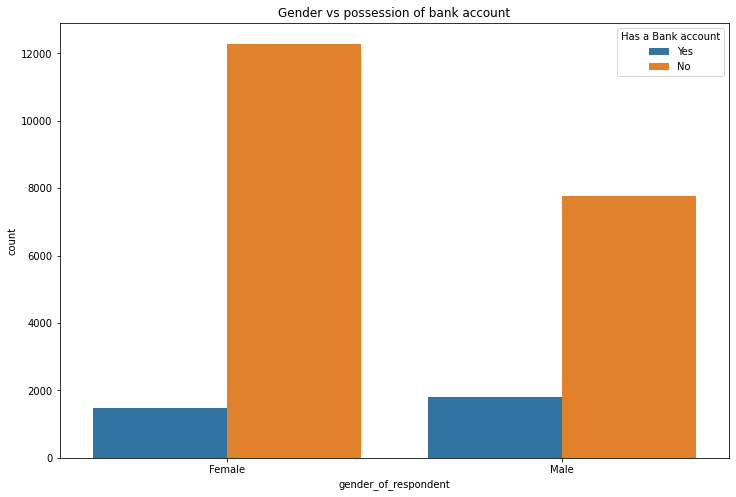

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['gender_of_respondent'],hue=df['Has a Bank account'])
plt.title('Gender vs possession of bank account')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship with head vs possession of bank account')

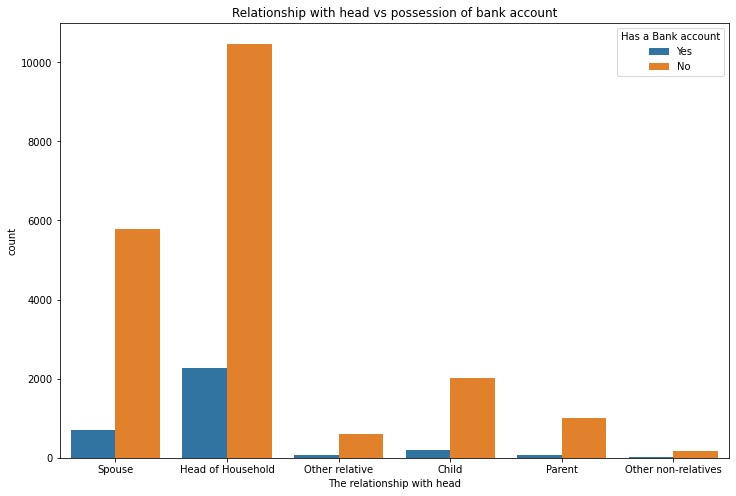

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['The relationship with head'],hue=df['Has a Bank account'])
plt.title('Relationship with head vs possession of bank account')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Marital status vs possession of bank account')

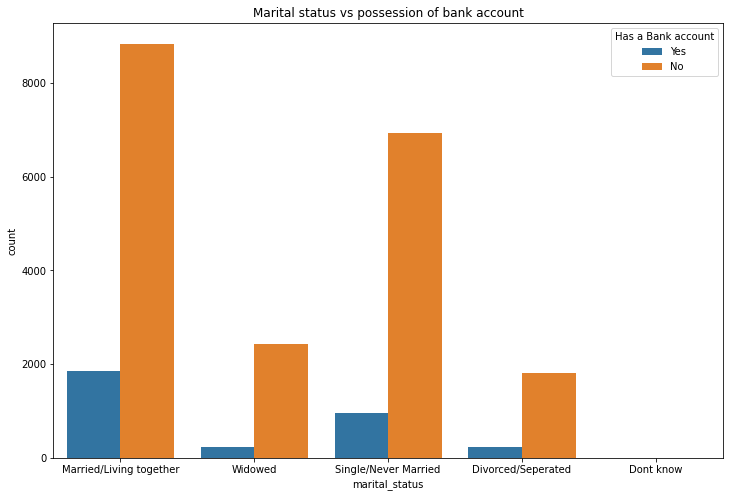

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['marital_status'],hue=df['Has a Bank account'])
plt.title('Marital status vs possession of bank account')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Level of education vs possession of bank account')

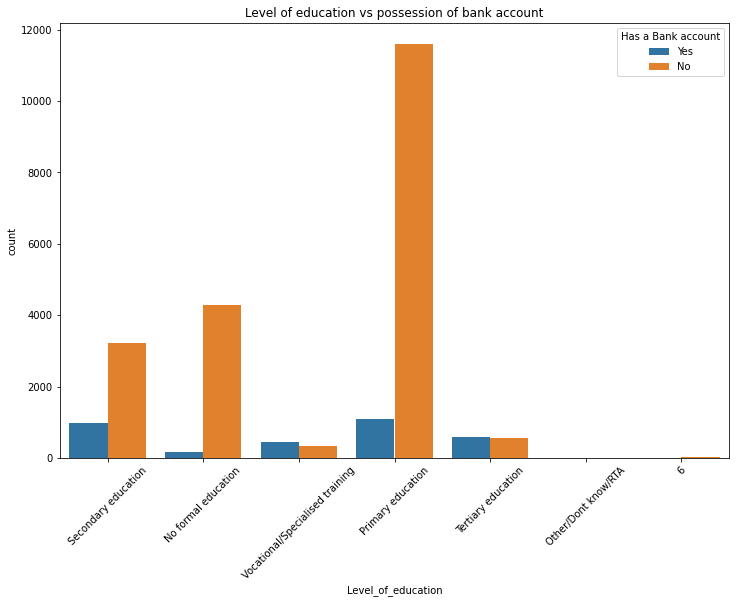

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Level_of_education'],hue=df['Has a Bank account'])
plt.xticks(rotation=45)
plt.title('Level of education vs possession of bank account')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of job vs possession of bank account')

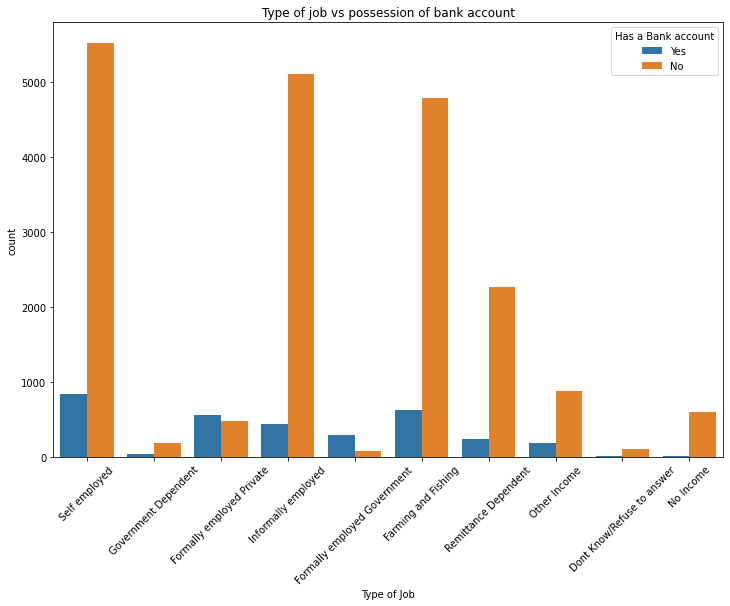

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['Type of Job'],hue=df['Has a Bank account'])
plt.xticks(rotation=45)
plt.title('Type of job vs possession of bank account')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Possession of bank account over the years')

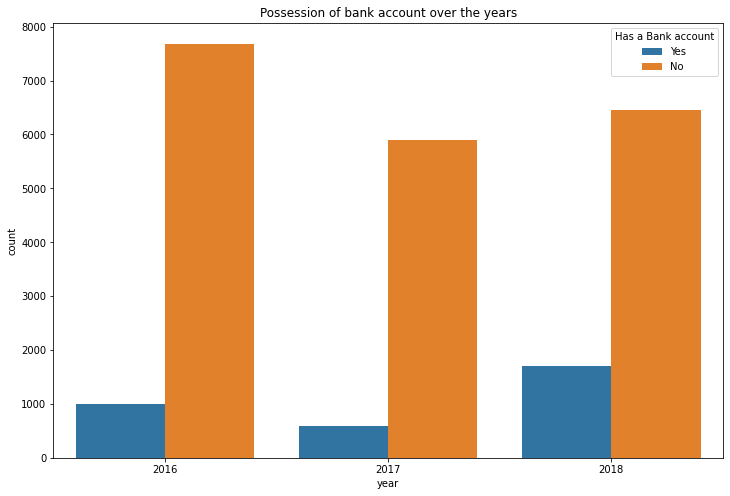

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['year'],hue=df['Has a Bank account'])
plt.title('Possession of bank account over the years')

## Numerical & Categorical Variables analysis

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


<Figure size 864x576 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


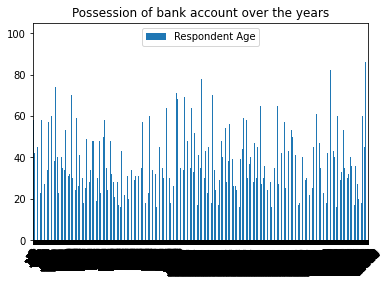

In [ ]:
plt.figure(figsize=(12,8))
df[['Respondent Age','Has a Bank account']].plot(kind='bar',stacked=True)
plt.xticks(rotation=45)
plt.title('Possession of bank account over the years')
plt.legend()

# **3.Multivariate Analysis**

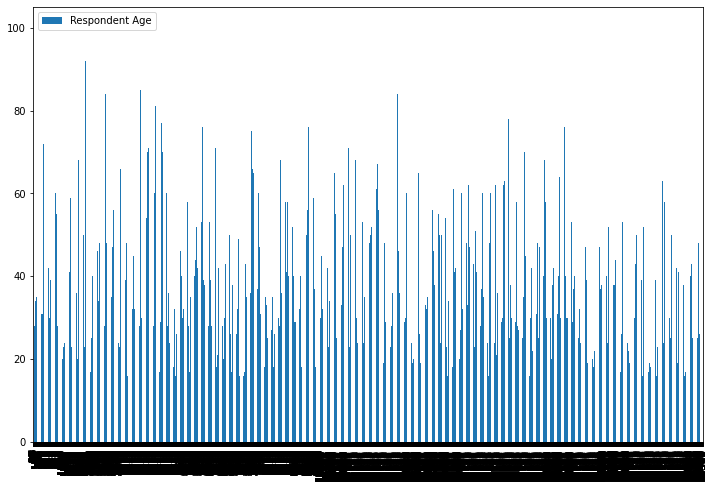

In [ ]:
df[['Respondent Age','Has a Bank account']].plot(kind='bar',stacked=True,figsize=(12,8))

In [ ]:
#Label encoding categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
df.apply(LabelEncoder().fit_transform)

In [ ]:
#Data Preprocessing
X=df.loc[:,['Has a Bank account']].values
Y=df.loc[:,['Cell Phone Access','country','household_size','Level_of_education','marital_status','Respondent Age','The relationship with head','Type of Job','Type of Location']].values

In [ ]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['country', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'gender_of_respondent',
       'The relationship with head', 'marital_status', 'Level_of_education',
       'Type of Job'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     23340 non-null  int64  
 1   year                        23340 non-null  int64  
 2   uniqueid                    23340 non-null  int64  
 3   Has a Bank account          23340 non-null  int64  
 4   Type of Location            23340 non-null  int64  
 5   Cell Phone Access           23340 non-null  int64  
 6   household_size              23340 non-null  float64
 7   Respondent Age              23340 non-null  float64
 8   gender_of_respondent        23340 non-null  int64  
 9   The relationship with head  23340 non-null  int64  
 10  marital_status              23340 non-null  int64  
 11  Level_of_education          23340 non-null  int64  
 12  Type of Job                 23340 non-null  int64  
dtypes: float64(2), int64(11)
memory

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)





ValueError: ignored

In [ ]:
df_col=list(df.columns)

for i in range(len(df_col)):
df[df_col[i]] = LabelEncoder().fit_transform(df[df_col[i]])

In [ ]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)